<a href="https://www.kaggle.com/code/sourabhkumarmandal/linear-regression-practice?scriptVersionId=184339687" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-data-dataset-for-linear-regression/Salary_Data.csv


In [2]:
data = pd.read_csv("/kaggle/input/salary-data-dataset-for-linear-regression/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
print(data.dtypes)

YearsExperience    float64
Salary               int64
dtype: object


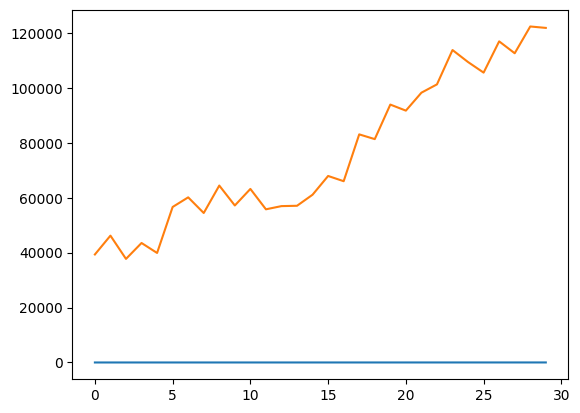

In [4]:
plt.plot(data)

In [5]:
x=data['YearsExperience']
y=data['Salary']

In [6]:
print(x.head())
x=x.values

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64


In [7]:
print(y.head())
y=y.values

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [9]:
# Verify the splits
print(f"Training features shape: {x_train.shape}")
print(f"Testing features shape: {x_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (27,)
Testing features shape: (3,)
Training labels shape: (27,)
Testing labels shape: (3,)


In [10]:
print(type(x_train), type(y_train))
print(type(x_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [11]:
m,=x_train.shape
print(m)
n, = x.shape
# print(y_train[15])

27


In [12]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [13]:

w=0
b=0
alpha = 0.01
n_iter=10001
for i in range(n_iter):
    dj_db = 0
    dj_dw = 0
    for j in range(n):
        f_i = w * x[j] + b
        dj_db_i = f_i - y[j]
        dj_dw_i = (f_i - y[j]) * x[j]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_db /= m
    dj_dw /= m
    
    b = b - alpha * dj_db
    w = w - alpha * dj_dw
    if (i % 1000 == 0):
        print(f"number of iteration done = {i}")
        
    

number of iteration done = 0
number of iteration done = 1000
number of iteration done = 2000
number of iteration done = 3000
number of iteration done = 4000
number of iteration done = 5000
number of iteration done = 6000
number of iteration done = 7000
number of iteration done = 8000
number of iteration done = 9000
number of iteration done = 10000


In [14]:
print(w,b)

[9449.96232167] [25792.20019723]


In [15]:
for i in range(n):
    cost=0
    cost += (w*x[i] - y[i])**2
cost/=(2*n)
print(cost)

[8548408.80801995]


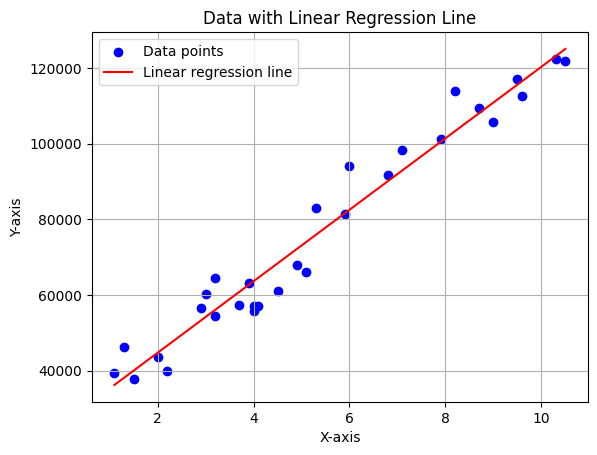

In [16]:
# Plot data points
plt.scatter(x, y, color='blue', label='Data points')

# Fit a linear regression line
slope, intercept = w,b

# Plot the regression line
plt.plot(x, slope * x + intercept, color='red', label='Linear regression line')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data with Linear Regression Line')
plt.legend()
plt.grid(True)

# Display plot
plt.show()

In [17]:
def r2_score(y_true, y_pred):
    # Calculate mean of observed values (y_true)
    mean_y_true = np.mean(y_true)
    
    # Calculate total sum of squares (SS_total)
    ss_total = np.sum((y_true - mean_y_true) ** 2)
    
    # Calculate residual sum of squares (SS_res)
    ss_res = np.sum((y_true - y_pred) ** 2)
    
    # Calculate R^2 score
    r2 = 1 - (ss_res / ss_total)
    
    return r2

In [18]:
y_pred = np.zeros(n).reshape(-1,1)
for i in range(n):
    y_pred[i] = (w * x[i] + b)
y_pred

array([[ 36187.15875107],
       [ 38077.1512154 ],
       [ 39967.14367973],
       [ 44692.12484057],
       [ 46582.1173049 ],
       [ 53197.09093007],
       [ 54142.08716224],
       [ 56032.07962657],
       [ 56032.07962657],
       [ 60757.0607874 ],
       [ 62647.05325174],
       [ 63592.0494839 ],
       [ 63592.0494839 ],
       [ 64537.04571607],
       [ 68317.03064474],
       [ 72097.01557341],
       [ 73987.00803774],
       [ 75877.00050207],
       [ 81546.97789507],
       [ 82491.97412724],
       [ 90051.94398458],
       [ 92886.93268108],
       [100446.90253841],
       [103281.89123491],
       [108006.87239575],
       [110841.86109225],
       [115566.84225308],
       [116511.83848525],
       [123126.81211042],
       [125016.80457475]])

In [19]:
y_pred=np.array(y_pred)
print(type(y),type(y_pred))
r2 = r2_score(y,y_pred)
print(r2)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
0.9569566641435086


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

In [21]:
# Print coefficients, intercept, and R-squared score
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared score:", model.score(x, y))

Coefficients: [[9449.96232146]]
Intercept: [25792.20019867]
R-squared score: 0.9569566641435086


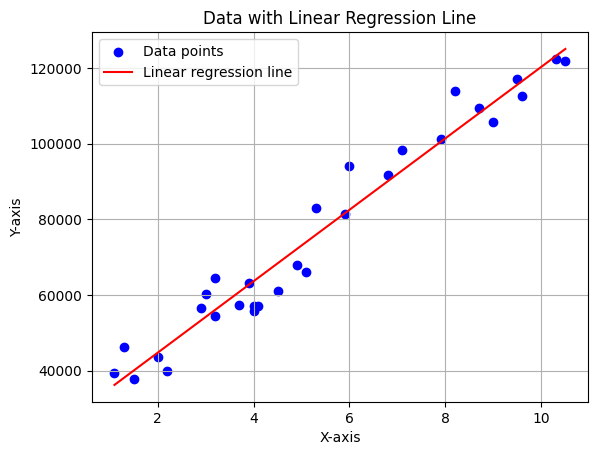

In [22]:
w=model.coef_
b=model.intercept_
# Plot data points
plt.scatter(x, y, color='blue', label='Data points')

# Fit a linear regression line
slope, intercept = w,b

# Plot the regression line
plt.plot(x, slope * x + intercept, color='red', label='Linear regression line')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data with Linear Regression Line')
plt.legend()
plt.grid(True)

# Display plot
plt.show()